In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib as mpl

mpl.rcParams.update({
    'axes.labelsize': 18,   # X、Y 軸標籤字體大小
    'axes.titlesize': 18,   # 子圖標題字體大小
    'xtick.labelsize': 16,  # X 軸刻度字體大小
    'ytick.labelsize': 16,  # Y 軸刻度字體大小
    'legend.fontsize': 16,  # 圖例字體大小
})

def custom_log_formatter(x, pos):
    """以 LaTeX 語法顯示科學記號格式 (例如 $10^{2}$ 或 $3\\times10^{2}$)。"""
    if x <= 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    coeff = x / (10 ** exponent)
    coeff = round(coeff, 1)
    if abs(coeff - 1) < 1e-8:
        return f"$10^{{{exponent}}}$"
    else:
        return f"$ {coeff}\\times10^{{{exponent}}} $"

# 假設總節點數為 10000
total_N = 10000

# ---------------------------
# 各策略數據（示範用數據）
# ---------------------------
random_coop = {11: 0.0472, 17: 0.0415, 20: 0.0185, 19: 0.0288, 16: 0.0499, 18: 0.0346,
               13: 0.0557, 6: 0.0268, 8: 0.0335, 9: 0.0377, 12: 0.0568, 10: 0.0484,
               14: 0.0553, 3: 0.0132, 5: 0.0213, 15: 0.052, 21: 0.0141, 7: 0.0296,
               4: 0.0188, 22: 0.0099, 27: 0.0012, 23: 0.0069, 2: 0.005, 25: 0.003,
               28: 0.0005, 1: 0.0013, 24: 0.0035, 26: 0.0016, 29: 0.0003, 31: 0.0002,
               30: 0.0001}
random_def  = {4: 0.0503, 3: 0.0635, 5: 0.0252, 2: 0.0657, 1: 0.0411, 0: 0.0132,
               7: 0.0053, 6: 0.0145, 9: 0.0011, 8: 0.0028, 10: 0.0001}

cooperator_coop = {18: 0.0372, 25: 0.0035, 16: 0.0508, 10: 0.0383, 13: 0.0523, 12: 0.0496,
                     15: 0.0533, 14: 0.0535, 8: 0.0319, 20: 0.0216, 11: 0.0404, 17: 0.0406,
                     9: 0.0316, 3: 0.0055, 6: 0.0202, 21: 0.0151, 22: 0.0097, 4: 0.0097,
                     19: 0.0285, 24: 0.0046, 5: 0.0166, 7: 0.0211, 23: 0.0058, 29: 0.0003,
                     28: 0.0006, 27: 0.0013, 2: 0.0021, 31: 0.0001, 26: 0.0019, 30: 0.0002,
                     1: 0.0002}
cooperator_def  = {2: 0.0617, 9: 0.0029, 5: 0.0498, 6: 0.029, 4: 0.0671, 1: 0.0357,
                     7: 0.0143, 3: 0.0735, 0: 0.0093, 8: 0.0065, 10: 0.0016, 11: 0.0004,
                     12: 0.0001}

minimum_degree_coop = {13: 0.5487, 14: 0.0247, 16: 0.009, 12: 0.0742, 18: 0.003,
                         15: 0.0155, 17: 0.0057, 24: 0.0001, 21: 0.001, 6: 0.0003,
                         19: 0.0018, 9: 0.0001, 20: 0.0004, 23: 0.0001, 22: 0.0002,
                         11: 0.0004, 5: 0.0001}
minimum_degree_def = {3: 0.0717, 6: 0.0193, 5: 0.0382, 1: 0.037, 7: 0.0085,
                        4: 0.0563, 2: 0.068, 8: 0.0029, 0: 0.0106, 10: 0.0006,
                        9: 0.0015, 11: 0.0001}

maximum_degree_coop = {
    6: 0.0497, 13: 0.0367, 12: 0.0487, 17: 0.0065, 9: 0.0705, 10: 0.0654,
    8: 0.0713, 7: 0.0566, 16: 0.0105, 14: 0.0259, 15: 0.0156, 11: 0.055,
    4: 0.0226, 3: 0.0119, 18: 0.0039, 5: 0.0362, 1: 0.0001, 2: 0.0056,
    5945: 0.0001, 2985: 0.0001, 57: 0.0001, 25: 0.0001, 19: 0.0018, 0.0013: 0.0013,  # 注意這裡原本資料可能有誤，保持原結構即可
    29: 0.0001, 22: 0.0004, 2005: 0.0001, 21: 0.0004, 1217: 0.0001, 23: 0.0001,
    675: 0.0001, 86: 0.0001, 167: 0.0001, 334: 0.0001, 5696: 0.0001, 5075: 0.0001,
    4102: 0.0001, 26: 0.0001, 37: 0.0001, 24: 0.0001
}
maximum_degree_def = {4: 0.0734, 6: 0.0409, 3: 0.0819, 2: 0.0594, 0: 0.0075,
                      1: 0.0326, 7: 0.0214, 5: 0.0608, 8: 0.0133, 9: 0.0056,
                      11: 0.0012, 10: 0.0025, 12: 0.0001, 13: 0.0001}

degree_dist_data = {
    "Random": (random_coop, random_def),
    "Cooperator": (cooperator_coop, cooperator_def),
    "Minimum Degree": (minimum_degree_coop, minimum_degree_def),
    "Maximum Degree": (maximum_degree_coop, maximum_degree_def)
}

def plot_degree_distribution_2x2_unified_data(degree_dist_data, total_N):
    """
    主圖的 y 軸根據策略設定固定刻度：
      - "Minimum Degree"：刻度為 [0, 0.2, 0.4, 0.6, 0.8, 1.0]
      - 其他策略：刻度為 [0, 0.02, 0.04, 0.06, 0.08, 0.1]
    只為 "Minimum Degree" 與 "Maximum Degree" 畫 inset 與連線（拉線）
    """
    strategies_in_order = ["Random", "Cooperator", "Minimum Degree", "Maximum Degree"]
    subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

    # 取得所有策略中最大 degree (用於主圖 x 軸)
    max_deg = 0
    for strat in strategies_in_order:
        if strat in degree_dist_data:
            coop_dist, def_dist = degree_dist_data[strat]
            if coop_dist:
                local_max = max(coop_dist.keys())
                if local_max > max_deg:
                    max_deg = local_max
            if def_dist:
                local_max = max(def_dist.keys())
                if local_max > max_deg:
                    max_deg = local_max
    if max_deg < 1:
        max_deg = 1

    main_xlim = max_deg * 1.2
    x_positions = np.arange(1, max_deg + 1)

    fig, axs = plt.subplots(2, 2, figsize=(10,8), constrained_layout=True)
    axs = axs.flatten()

    for i, strat in enumerate(strategies_in_order):
        ax = axs[i]
        # 將 subplot 編號放在左上角 (僅顯示編號，不包含策略名稱)，字體大小調整為 18
        ax.text(0, 1, subplot_labels[i], transform=ax.transAxes,
                fontsize=18, fontweight='bold', va='top')
        if strat not in degree_dist_data:
            ax.axis("off")
            continue

        coop_dist, def_dist = degree_dist_data[strat]
        # 主圖：依 degree (1 ~ max_deg) 畫出 fraction
        coop_vals = [coop_dist.get(d, 0) for d in range(1, max_deg+1)]
        def_vals  = [def_dist.get(d, 0) for d in range(1, max_deg+1)]

        bar_width = 0.8
        ax.bar(x_positions - bar_width/2, coop_vals, width=bar_width,
               alpha=0.5, color="blue", label="C")
        ax.bar(x_positions + bar_width/2, def_vals, width=bar_width,
               alpha=0.5, color="red", label="D")
        if strat == "Random":
            ax.legend(loc="best")

        # 主圖 y 軸刻度設定：依策略不同
        if strat == "Minimum Degree":
            custom_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
        else:
            custom_ticks = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
        ax.set_yticks(custom_ticks)
        ax.set_ylim(custom_ticks[0], custom_ticks[-1])
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

        # x, y 軸標籤設定
        if strat in ["Minimum Degree", "Maximum Degree"]:
            ax.set_xlabel("Degree", fontsize=18)
        else:
            ax.set_xlabel("")
        if strat in ["Minimum Degree", "Random"]:
            ax.set_ylabel("Fraction", fontsize=18)
        else:
            ax.set_ylabel("")

        # 對於 "Random" 與 "Cooperator"，隱藏 x 軸刻度文字
        if strat in ["Random", "Cooperator"]:
            ax.set_xticklabels([])

        # 主圖 x 軸：log 尺度與範圍
        ax.set_xscale("log")
        ax.set_xlim(1, main_xlim)

        # 只為 "Minimum Degree" 與 "Maximum Degree" 畫 inset 與連線（拉線）
        if strat in ["Minimum Degree", "Maximum Degree"]:
            if strat == "Minimum Degree":
                # inset zoom 範圍設定為 [1, 10]
                zoom_min = 1
                zoom_max = 10
                # inset 的 y 軸刻度設定 (與主圖不同)
                custom_ticks_inset = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
                bar_width_inset = 0.8  # 與主圖相近寬度
                inset_loc = "upper center"  # inset 放置在上方中間
                inset_kwargs = {}
            else:  # strat == "Maximum Degree"
                zoom_min = max_deg * 0.6
                zoom_max = max_deg
                custom_ticks_inset = [0, 1/total_N, 2/total_N, 3/total_N, 4/total_N, 5/total_N]
                bar_width_inset = 100
                inset_loc = "upper right"  # inset 放置在上方右側
                inset_kwargs = {
                    "bbox_to_anchor": (-0.05, 0, 1, 1),
                    "bbox_transform": ax.transAxes
                }

            # 取得 zoom 區間內有資料的 degree 值（僅取有資料的鍵）
            keys_in_inset = sorted(set([d for d in coop_dist if zoom_min <= d <= zoom_max] +
                                         [d for d in def_dist if zoom_min <= d <= zoom_max]))
            if keys_in_inset:
                coop_zoom = [coop_dist.get(d, 0) for d in keys_in_inset]
                def_zoom  = [def_dist.get(d, 0) for d in keys_in_inset]

                # 建立 inset
                if inset_kwargs:
                    axins = inset_axes(ax, width="30%", height="30%", loc=inset_loc,
                                       borderpad=2, **inset_kwargs)
                else:
                    axins = inset_axes(ax, width="30%", height="30%", loc=inset_loc,
                                       borderpad=2)

                axins.bar(np.array(keys_in_inset) - bar_width_inset/2, coop_zoom,
                          width=bar_width_inset, alpha=0.5, color="blue")
                axins.bar(np.array(keys_in_inset) + bar_width_inset/2, def_zoom,
                          width=bar_width_inset, alpha=0.5, color="red")

                # 小圖 x 軸：log 尺度與範圍
                axins.set_xscale("log")
                if strat == "Minimum Degree":
                    axins.set_xlim(zoom_min, zoom_max)  # 固定為 [1,10]
                else:
                    axins.set_xlim(zoom_min, zoom_max * 1.2)

                # 小圖 y 軸設定
                axins.set_yticks(custom_ticks_inset)
                axins.set_ylim(custom_ticks_inset[0], custom_ticks_inset[-1])
                # 小圖 x 軸僅顯示首尾兩個 tick
                if strat == "Minimum Degree":
                    tick_min = zoom_min
                    tick_max = zoom_max
                else:
                    tick_min = zoom_min
                    tick_max = zoom_max * 1.2
                axins.set_xticks([tick_min, tick_max])
                axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_log_formatter))
                axins.xaxis.set_minor_formatter(ticker.NullFormatter())

                # 使用 mark_inset 畫出主圖與 inset 之間的連線（拉線）
                mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

    plt.show()


if __name__ == "__main__":
    plot_degree_distribution_2x2_unified_data(degree_dist_data, total_N=total_N)

# -------------------------------
def custom_log_formatter(x, pos):
    if x <= 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    coeff = x / (10 ** exponent)
    coeff = round(coeff, 1)
    if abs(coeff - 1) < 1e-8:
        return f"$10^{{{exponent}}}$"
    else:
        return f"$ {coeff}\\times10^{{{exponent}}} $"

# -------------------------------
# 1. 初始化網路
# -------------------------------
def initialize_network(N, M, initial_defector_ratio):
    random.seed(1337)
    G = nx.gnm_random_graph(N, M)
    num_defectors = int(N * initial_defector_ratio)
    states = ['D'] * num_defectors + ['C'] * (N - num_defectors)
    random.shuffle(states)
    for node, state in zip(G.nodes(), states):
        G.nodes[node]['state'] = state
    return G

# -------------------------------
# 2. 核心函數：更新策略與重連
# -------------------------------
def update_strategy(G, alpha, u, discordant_edges):
    if discordant_edges:
        edge = random.choice(tuple(discordant_edges))
        # 選取邊中狀態為 C 的節點作為 c_node，其餘為 d_node
        c_node, d_node = edge if G.nodes[edge[0]]['state'] == 'C' else (edge[1], edge[0])
        payoff1 = sum(1 for n in G.neighbors(c_node) if G.nodes[n]['state'] == 'C')
        payoff2 = sum((1 + u) if G.nodes[n]['state'] == 'C' else u for n in G.neighbors(d_node))
        diff = payoff1 - payoff2
        if diff <= 2:
            probability_1_to_2 = 1 / (1 + np.exp(alpha * diff))
        else:
            probability_1_to_2 = 0
        if random.random() < probability_1_to_2:
            G.nodes[c_node]['state'] = 'D'
            changed_node = c_node
        else:
            G.nodes[d_node]['state'] = 'C'
            changed_node = d_node
        discordant_edges.discard(edge)
        for neighbor in G.neighbors(changed_node):
            e2 = tuple(sorted([changed_node, neighbor]))
            if G.nodes[changed_node]['state'] != G.nodes[neighbor]['state']:
                discordant_edges.add(e2)
            else:
                discordant_edges.discard(e2)
    return discordant_edges

def rewire(G, discordant_edges, strategy_type, p, threshold):
    if discordant_edges:
        edge = random.choice(tuple(discordant_edges))
        c_node, d_node = edge if G.nodes[edge[0]]['state'] == 'C' else (edge[1], edge[0])
        G.remove_edge(*edge)
        discordant_edges.discard(edge)
        neighbors_set = set(G.neighbors(c_node))
        potential_nodes = list(set(G.nodes()) - neighbors_set - {c_node})
        new_node = None
        if strategy_type == 'hybrid':
            coop_fraction = calculate_cooperation_fraction(G)
            strategy_type = 'max_degree_C' if coop_fraction < threshold else 'min_degree_C'
        if strategy_type == 'max_degree_C':
            max_degree = -1
            for node in potential_nodes:
                if G.nodes[node]['state'] == 'C' and G.degree[node] > max_degree:
                    max_degree = G.degree[node]
                    new_node = node
        elif strategy_type == 'min_degree_C':
            min_degree = float('inf')
            for node in potential_nodes:
                if G.nodes[node]['state'] == 'C' and G.degree[node] < min_degree:
                    min_degree = G.degree[node]
                    new_node = node
        elif strategy_type == 'nearest_C':
            min_dist = float('inf')
            for node in potential_nodes:
                if G.nodes[node]['state'] == 'C' and nx.has_path(G, c_node, node):
                    dist = nx.shortest_path_length(G, c_node, node)
                    if dist < min_dist:
                        min_dist = dist
                        new_node = node
        elif strategy_type == 'farthest_C':
            max_dist = -1
            for node in potential_nodes:
                if G.nodes[node]['state'] == 'C' and nx.has_path(G, c_node, node):
                    dist = nx.shortest_path_length(G, c_node, node)
                    if dist > max_dist:
                        max_dist = dist
                        new_node = node
        elif strategy_type == 'probabilistic':
            if random.random() < p:
                coop_nodes = [n for n in potential_nodes if G.nodes[n]['state'] == 'C']
                if coop_nodes:
                    new_node = random.choice(coop_nodes)
                elif potential_nodes:
                    new_node = random.choice(potential_nodes)
            else:
                if potential_nodes:
                    new_node = random.choice(potential_nodes)
        elif strategy_type == 'random':
            if potential_nodes:
                new_node = random.choice(potential_nodes)
        if new_node is None and potential_nodes:
            new_node = random.choice(potential_nodes)
        if new_node is not None:
            G.add_edge(c_node, new_node)
            for nbr in G.neighbors(c_node):
                e2 = tuple(sorted([c_node, nbr]))
                if G.nodes[c_node]['state'] != G.nodes[nbr]['state']:
                    discordant_edges.add(e2)
                else:
                    discordant_edges.discard(e2)
    return discordant_edges

# -------------------------------
# 3. simulate 函數
# -------------------------------
def simulate(G, alpha, u, w, max_times, strategy_type, p, threshold):
    iteration = 0
    disc_edges = set(tuple(sorted((i, j))) for i, j in G.edges()
                     if G.nodes[i]['state'] != G.nodes[j]['state'])
    while iteration < max_times and disc_edges:
        if random.random() < w:
            disc_edges = update_strategy(G, alpha, u, disc_edges)
        else:
            disc_edges = rewire(G, disc_edges, strategy_type, p, threshold)
        iteration += 1
    return G

# -------------------------------
# 輔助函數：計算度數分佈
# -------------------------------
def calculate_cooperation_fraction(G):
    cooperators = sum(1 for n in G.nodes() if G.nodes[n]['state'] == 'C')
    return cooperators / G.number_of_nodes()

def calculate_degree_distribution_by_state(G):
    """
    分別計算 C 與 D 節點的度數分佈，其中：
      - C 節點的比例以 (具有該度數的 C 節點數 / 總節點數) 表示
      - D 節點的比例以 (具有該度數的 D 節點數 / 總節點數) 表示
    """
    coop_nodes = [n for n in G.nodes() if G.nodes[n]['state'] == 'C']
    def_nodes  = [n for n in G.nodes() if G.nodes[n]['state'] == 'D']

    coop_degs = [G.degree(n) for n in coop_nodes]
    def_degs  = [G.degree(n) for n in def_nodes]

    total_nodes = G.number_of_nodes()
    coop_counter = Counter(coop_degs)
    def_counter  = Counter(def_degs)

    coop_dist = {deg: (cnt / total_nodes) for deg, cnt in coop_counter.items()} if coop_counter else {}
    def_dist  = {deg: (cnt / total_nodes) for deg, cnt in def_counter.items()} if def_counter else {}
    return coop_dist, def_dist


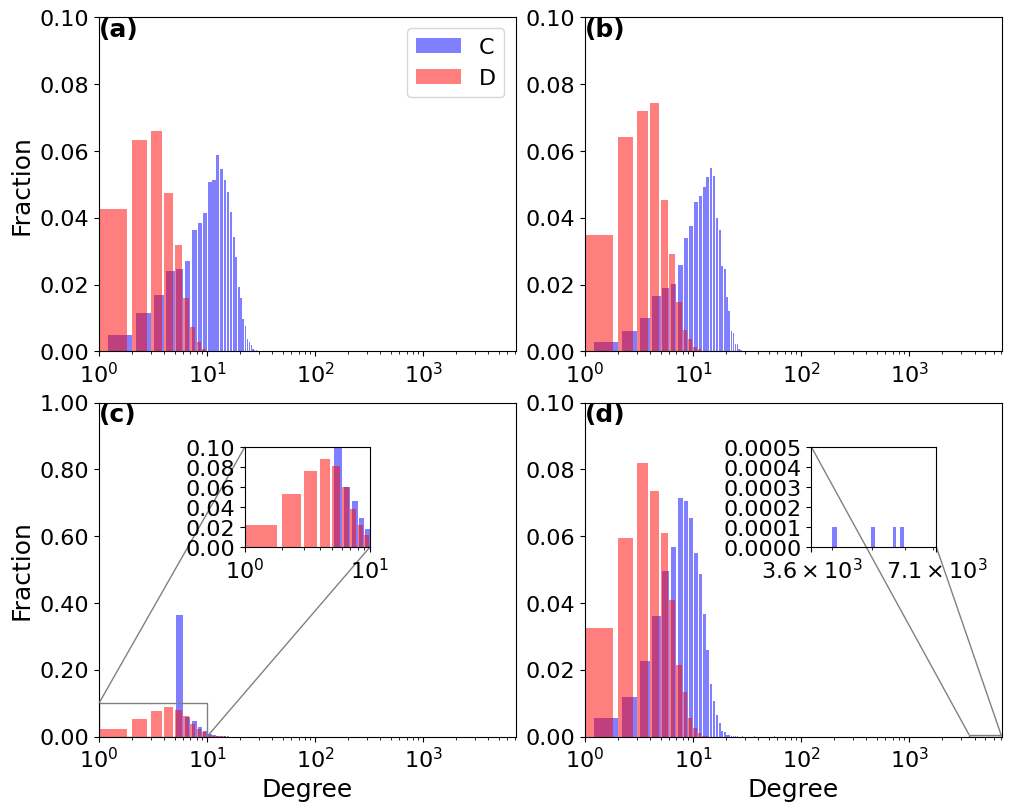

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib as mpl
import networkx as nx
import random
from collections import Counter

# Update matplotlib parameters for consistent plot styling
mpl.rcParams.update({
    'axes.labelsize': 18,   # Font size for X and Y axis labels
    'axes.titlesize': 18,   # Font size for subplot titles (not used here)
    'xtick.labelsize': 16,  # Font size for X-axis tick labels
    'ytick.labelsize': 16,  # Font size for Y-axis tick labels
    'legend.fontsize': 16,  # Font size for legend
})

def custom_log_formatter(x, pos):
    """Custom formatter for log scale ticks, displaying scientific notation in LaTeX (e.g., $10^{2}$ or $3\\times10^{2}$)."""
    if x <= 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    coeff = x / (10 ** exponent)
    coeff = round(coeff, 1)
    if abs(coeff - 1) < 1e-8:
        return f"$10^{{{exponent}}}$"
    else:
        return f"$ {coeff}\\times10^{{{exponent}}} $"

# -------------------------------
# 1. Network Initialization
# -------------------------------
def initialize_network(N, M, initial_defector_ratio):
    """Initialize a random graph with N nodes and M edges, assigning 'C' (cooperator) or 'D' (defector) states."""
    random.seed(1337)  # Set seed for reproducibility
    G = nx.gnm_random_graph(N, M)  # Create a random graph
    num_defectors = int(N * initial_defector_ratio)  # Calculate number of defectors
    states = ['D'] * num_defectors + ['C'] * (N - num_defectors)  # Create state list
    random.shuffle(states)  # Randomly shuffle states
    for node, state in zip(G.nodes(), states):  # Assign states to nodes
        G.nodes[node]['state'] = state
    return G

# -------------------------------
# 2. Core Functions: Strategy Update and Rewiring
# -------------------------------
def update_strategy(G, alpha, u, discordant_edges):
    """Update the state of a node along a discordant edge based on payoff difference."""
    if discordant_edges:
        edge = random.choice(tuple(discordant_edges))  # Randomly select a discordant edge
        # Identify cooperator (C) and defector (D) nodes
        c_node, d_node = edge if G.nodes[edge[0]]['state'] == 'C' else (edge[1], edge[0])
        # Calculate payoffs: C gets 1 per cooperating neighbor; D gets (1+u) per C, u per D
        payoff1 = sum(1 for n in G.neighbors(c_node) if G.nodes[n]['state'] == 'C')
        payoff2 = sum((1 + u) if G.nodes[n]['state'] == 'C' else u for n in G.neighbors(d_node))
        diff = payoff1 - payoff2
        # Transition probability: logistic if difference <= 2, otherwise 0
        probability_1_to_2 = 1 / (1 + np.exp(alpha * diff)) if diff <= 2 else 0
        # Update state based on probability
        if random.random() < probability_1_to_2:
            G.nodes[c_node]['state'] = 'D'
            changed_node = c_node
        else:
            G.nodes[d_node]['state'] = 'C'
            changed_node = d_node
        discordant_edges.discard(edge)  # Remove processed edge
        # Update discordant edges for the changed node
        for neighbor in G.neighbors(changed_node):
            e2 = tuple(sorted([changed_node, neighbor]))
            if G.nodes[changed_node]['state'] != G.nodes[neighbor]['state']:
                discordant_edges.add(e2)
            else:
                discordant_edges.discard(e2)
    return discordant_edges

def rewire(G, discordant_edges, strategy_type, p, threshold):
    """Rewire a discordant edge based on the specified strategy, updating the discordant edge set."""
    if discordant_edges:
        edge = random.choice(tuple(discordant_edges))  # Select a discordant edge
        c_node, d_node = edge if G.nodes[edge[0]]['state'] == 'C' else (edge[1], edge[0])
        G.remove_edge(*edge)  # Remove the edge
        discordant_edges.discard(edge)
        # Identify potential nodes for rewiring (excluding current neighbors and self)
        neighbors_set = set(G.neighbors(c_node))
        potential_nodes = list(set(G.nodes()) - neighbors_set - {c_node})
        new_node = None

        # Handle hybrid strategy: switch based on cooperation fraction
        if strategy_type == 'hybrid':
            coop_fraction = calculate_cooperation_fraction(G)
            strategy_type = 'max_degree_C' if coop_fraction < threshold else 'min_degree_C'

        # Rewiring strategies
        if strategy_type == 'max_degree_C':
            max_degree = -1
            for node in potential_nodes:
                if G.nodes[node]['state'] == 'C' and G.degree[node] > max_degree:
                    max_degree = G.degree[node]
                    new_node = node
        elif strategy_type == 'min_degree_C':
            min_degree = float('inf')
            for node in potential_nodes:
                if G.nodes[node]['state'] == 'C' and G.degree[node] < min_degree:
                    min_degree = G.degree[node]
                    new_node = node
        elif strategy_type == 'probabilistic':
            if random.random() < p:
                coop_nodes = [n for n in potential_nodes if G.nodes[n]['state'] == 'C']
                new_node = random.choice(coop_nodes) if coop_nodes else random.choice(potential_nodes)
            else:
                new_node = random.choice(potential_nodes) if potential_nodes else None
        elif strategy_type == 'random':
            new_node = random.choice(potential_nodes) if potential_nodes else None

        # Fallback: if no node selected, choose randomly
        if new_node is None and potential_nodes:
            new_node = random.choice(potential_nodes)
        if new_node:
            G.add_edge(c_node, new_node)  # Add new edge
            # Update discordant edges for c_node's neighbors
            for nbr in G.neighbors(c_node):
                e2 = tuple(sorted([c_node, nbr]))
                if G.nodes[c_node]['state'] != G.nodes[nbr]['state']:
                    discordant_edges.add(e2)
                else:
                    discordant_edges.discard(e2)
    return discordant_edges

# -------------------------------
# 3. Simulation Function
# -------------------------------
def simulate(G, alpha, u, w, max_times, strategy_type, p, threshold):
    """Simulate network evolution until max iterations or no discordant edges remain."""
    iteration = 0
    # Initialize discordant edges (edges between C and D nodes)
    disc_edges = set(tuple(sorted((i, j))) for i, j in G.edges()
                     if G.nodes[i]['state'] != G.nodes[j]['state'])
    while iteration < max_times and disc_edges:
        if random.random() < w:
            disc_edges = update_strategy(G, alpha, u, disc_edges)  # Update strategy
        else:
            disc_edges = rewire(G, disc_edges, strategy_type, p, threshold)  # Rewire edge
        iteration += 1
    return G

# -------------------------------
# 4. Helper Functions
# -------------------------------
def calculate_cooperation_fraction(G):
    """Calculate the fraction of cooperating nodes in the network."""
    cooperators = sum(1 for n in G.nodes() if G.nodes[n]['state'] == 'C')
    return cooperators / G.number_of_nodes()

def calculate_degree_distribution_by_state(G):
    """
    Calculate degree distributions for C and D nodes separately.
    - Fraction for C nodes = (number of C nodes with degree d / total nodes)
    - Fraction for D nodes = (number of D nodes with degree d / total nodes)
    """
    coop_nodes = [n for n in G.nodes() if G.nodes[n]['state'] == 'C']  # List of cooperator nodes
    def_nodes  = [n for n in G.nodes() if G.nodes[n]['state'] == 'D']  # List of defector nodes

    coop_degs = [G.degree(n) for n in coop_nodes]  # Degrees of C nodes
    def_degs  = [G.degree(n) for n in def_nodes]   # Degrees of D nodes

    total_nodes = G.number_of_nodes()
    coop_counter = Counter(coop_degs)  # Count occurrences of each degree for C nodes
    def_counter  = Counter(def_degs)   # Count occurrences of each degree for D nodes

    # Convert counts to fractions
    coop_dist = {deg: (cnt / total_nodes) for deg, cnt in coop_counter.items()} if coop_counter else {}
    def_dist  = {deg: (cnt / total_nodes) for deg, cnt in def_counter.items()} if def_counter else {}
    return coop_dist, def_dist

# -------------------------------
# 5. Plotting Function
# -------------------------------
def plot_degree_distribution_2x2_unified_data(degree_dist_data, total_N):
    """
    Plot degree distributions in a 2x2 grid with custom y-axis ticks per strategy.
    - 'Minimum Degree' uses ticks [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    - Other strategies use [0, 0.02, 0.04, 0.06, 0.08, 0.1]
    - Inset plots with connecting lines are added only for 'Minimum Degree' and 'Maximum Degree'.
    """
    strategies_in_order = ["Random", "Cooperator", "Minimum Degree", "Maximum Degree"]
    subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

    # Determine maximum degree across all strategies for x-axis limit
    max_deg = 0
    for strat in strategies_in_order:
        if strat in degree_dist_data:
            coop_dist, def_dist = degree_dist_data[strat]
            if coop_dist:
                local_max = max(coop_dist.keys())
                if local_max > max_deg:
                    max_deg = local_max
            if def_dist:
                local_max = max(def_dist.keys())
                if local_max > max_deg:
                    max_deg = local_max
    if max_deg < 1:
        max_deg = 1

    main_xlim = max_deg * 1.2
    x_positions = np.arange(1, max_deg + 1)

    fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
    axs = axs.flatten()

    for i, strat in enumerate(strategies_in_order):
        ax = axs[i]
        # Add subplot label at top-left corner
        ax.text(0, 1, subplot_labels[i], transform=ax.transAxes,
                fontsize=18, fontweight='bold', va='top')
        if strat not in degree_dist_data:
            ax.axis("off")
            continue

        coop_dist, def_dist = degree_dist_data[strat]
        # Prepare data for main plot: fractions for each degree from 1 to max_deg
        coop_vals = [coop_dist.get(d, 0) for d in range(1, max_deg + 1)]
        def_vals  = [def_dist.get(d, 0) for d in range(1, max_deg + 1)]

        bar_width = 0.8
        # Plot bars for cooperators (C) and defectors (D)
        ax.bar(x_positions - bar_width/2, coop_vals, width=bar_width,
               alpha=0.5, color="blue", label="C")
        ax.bar(x_positions + bar_width/2, def_vals, width=bar_width,
               alpha=0.5, color="red", label="D")
        if strat == "Random":
            ax.legend(loc="best")  # Show legend only for 'Random'

        # Set custom y-axis ticks based on strategy
        if strat == "Minimum Degree":
            custom_ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
        else:
            custom_ticks = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
        ax.set_yticks(custom_ticks)
        ax.set_ylim(custom_ticks[0], custom_ticks[-1])
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

        # Set axis labels
        if strat in ["Minimum Degree", "Maximum Degree"]:
            ax.set_xlabel("Degree", fontsize=18)
        else:
            ax.set_xlabel("")
        if strat in ["Minimum Degree", "Random"]:
            ax.set_ylabel("Fraction", fontsize=18)
        else:
            ax.set_ylabel("")

        # Hide x-axis tick labels for 'Random' and 'Cooperator'
        if strat in ["Random", "Cooperator"]:
            ax.set_xticklabels([])

        # Set x-axis to log scale and define range
        ax.set_xscale("log")
        ax.set_xlim(1, main_xlim)

        # Add inset plots with connecting lines for 'Minimum Degree' and 'Maximum Degree'
        if strat in ["Minimum Degree", "Maximum Degree"]:
            if strat == "Minimum Degree":
                zoom_min = 1
                zoom_max = 10
                custom_ticks_inset = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
                bar_width_inset = 0.8
                inset_loc = "upper center"
                inset_kwargs = {}
            else:  # 'Maximum Degree'
                zoom_min = max_deg * 0.6
                zoom_max = max_deg
                custom_ticks_inset = [0, 1/total_N, 2/total_N, 3/total_N, 4/total_N, 5/total_N]
                bar_width_inset = 100
                inset_loc = "upper right"
                inset_kwargs = {"bbox_to_anchor": (-0.05, 0, 1, 1), "bbox_transform": ax.transAxes}

            # Get degrees within zoom range that have data
            keys_in_inset = sorted(set([d for d in coop_dist if zoom_min <= d <= zoom_max] +
                                       [d for d in def_dist if zoom_min <= d <= zoom_max]))
            if keys_in_inset:
                coop_zoom = [coop_dist.get(d, 0) for d in keys_in_inset]
                def_zoom  = [def_dist.get(d, 0) for d in keys_in_inset]

                # Create inset plot
                axins = inset_axes(ax, width="30%", height="30%", loc=inset_loc,
                                   borderpad=2, **inset_kwargs)
                axins.bar(np.array(keys_in_inset) - bar_width_inset/2, coop_zoom,
                          width=bar_width_inset, alpha=0.5, color="blue")
                axins.bar(np.array(keys_in_inset) + bar_width_inset/2, def_zoom,
                          width=bar_width_inset, alpha=0.5, color="red")

                # Set inset x-axis to log scale and define range
                axins.set_xscale("log")
                axins.set_xlim(zoom_min, zoom_max * (1 if strat == "Minimum Degree" else 1.2))

                # Set inset y-axis ticks
                axins.set_yticks(custom_ticks_inset)
                axins.set_ylim(custom_ticks_inset[0], custom_ticks_inset[-1])

                # Set inset x-axis ticks to show only min and max
                tick_min = zoom_min
                tick_max = zoom_max if strat == "Minimum Degree" else zoom_max * 1.2
                axins.set_xticks([tick_min, tick_max])
                axins.xaxis.set_major_formatter(ticker.FuncFormatter(custom_log_formatter))
                axins.xaxis.set_minor_formatter(ticker.NullFormatter())

                # Add connecting lines between main plot and inset
                mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

    plt.show()

# -------------------------------
# Main Execution
# -------------------------------
if __name__ == "__main__":
    # Simulation parameters
    N = 10000                   # Number of nodes
    M = 50000                  # Number of edges
    initial_defector_ratio = 0.5  # Initial fraction of defectors
    alpha = 30                 # Sensitivity parameter for strategy update
    u = 0.2                    # Cost-to-benefit ratio
    w = 0.1                    # Probability of strategy update vs. rewiring
    max_times = 10**12      # Maximum iterations
    p = 1                      # Probability for probabilistic rewiring
    threshold = 0.5            # Threshold for hybrid strategy
    strategies = ["random", "probabilistic", "min_degree_C", "max_degree_C"]  # Strategies to simulate

    # Run simulations and calculate degree distributions
    degree_dist_data = {}
    for strategy in strategies:
        G = initialize_network(N, M, initial_defector_ratio)
        G = simulate(G, alpha, u, w, max_times, strategy, p, threshold)
        coop_dist, def_dist = calculate_degree_distribution_by_state(G)
        # Map strategy names for plotting
        plot_strategy = "Random" if strategy == "random" else \
                        "Cooperator" if strategy == "probabilistic" else \
                        "Minimum Degree" if strategy == "min_degree_C" else "Maximum Degree"
        degree_dist_data[plot_strategy] = (coop_dist, def_dist)

    # Plot the degree distributions
    plot_degree_distribution_2x2_unified_data(degree_dist_data, total_N=N)